## Gamespot video game review analysis with NLP

### Webscraping

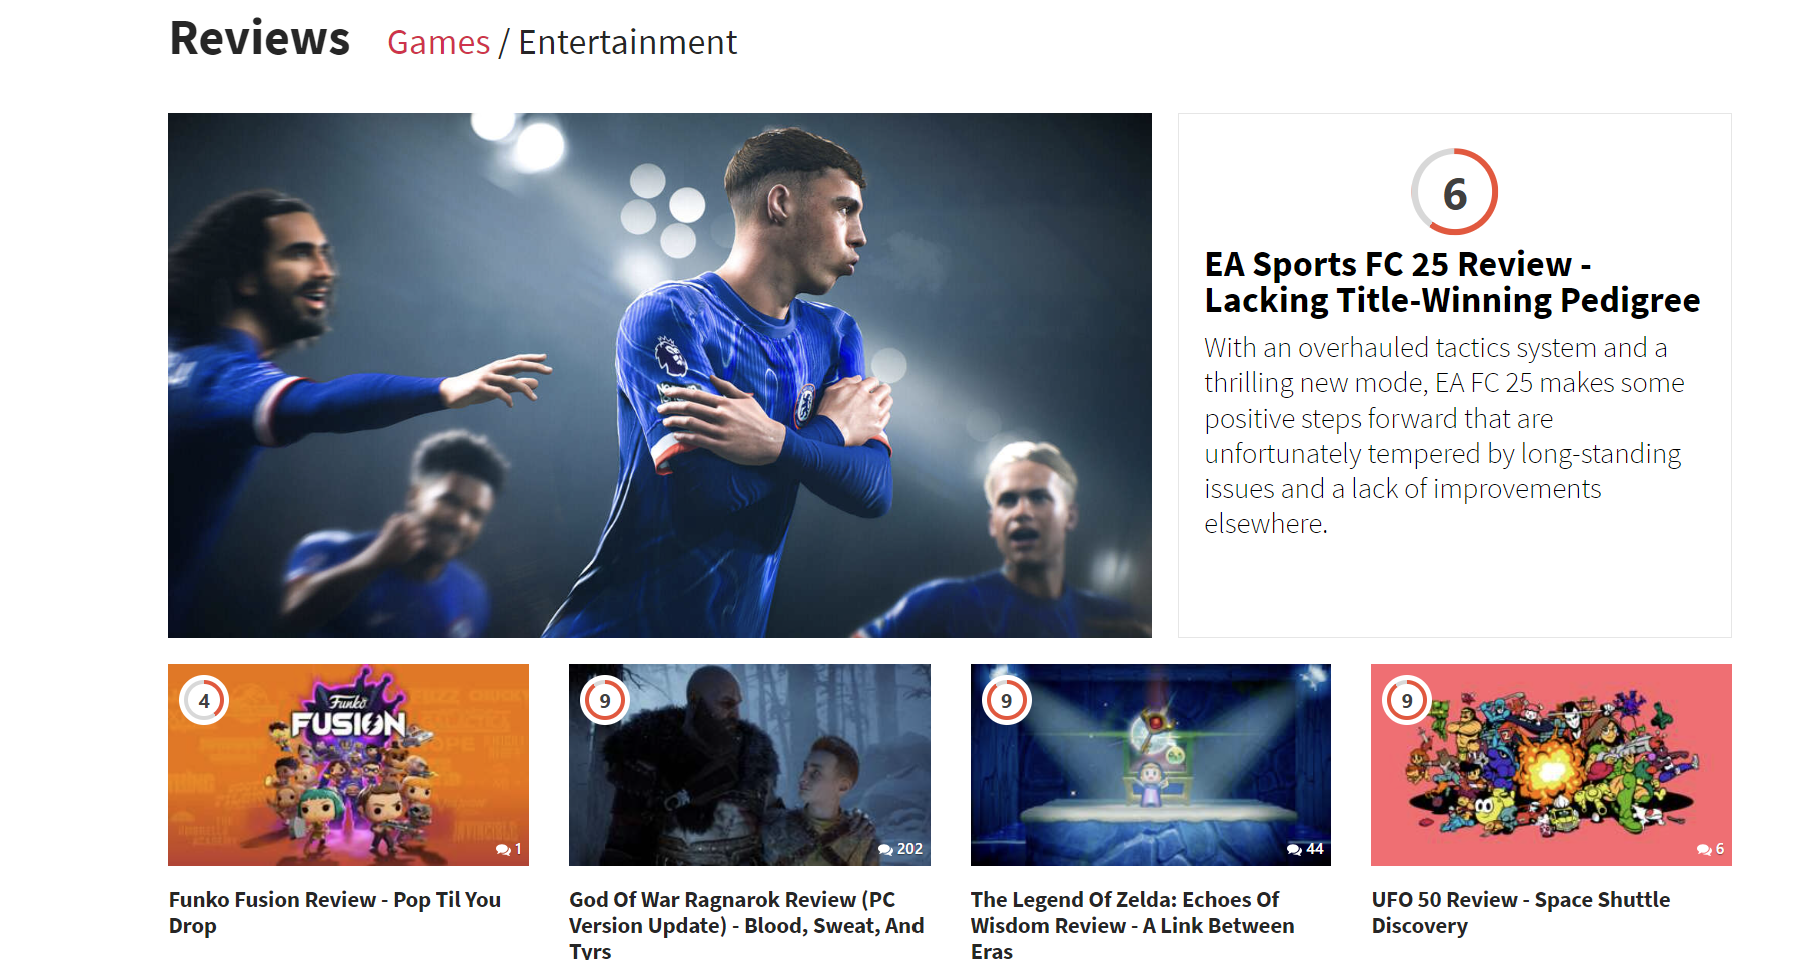

Picture Source: https://www.gamespot.com/games/reviews/

### Web Scraping Overview:

I extracted 500 pages of GameSpot video game reviews for my NLP analysis, resulting in over 10,000 game reviews to analyze. The goal was to specifically extract the review text, game score, and game title from each page. To accomplish this, I used Beautiful Soup for web scraping and saved the extracted data to a CSV file, ensuring that the scraping process doesn't need to be repeated for future analysis and that the DataFrame can be imported for each notebook.

## Imports and webscraping

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:


# Extracting the full review text from individual review pages
def get_review_content(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    review_content = "\n".join([para.text.strip() for para in paragraphs])
    return review_content

# Scraping reviews from a given page
def scrape_reviews_from_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Finding all review links on the page
    reviews_section = soup.find_all('a', class_='card-item__link')
    reviews = []
    
    for review in reviews_section:
        title = review.text.strip()
        review_link = review['href']
        full_link = f"https://www.gamespot.com{review_link}"
        
        # Extracting review score
        score_tag = review.find_next('div', class_='review-ring-score__score')
        score = score_tag.text.strip() if score_tag else 'No score available'

        # Getting review content
        review_content = get_review_content(full_link)

        # Appending the data to the list
        reviews.append([title, score, full_link, review_content])
    
    return reviews

# Function to scrape all pages from 1 to 500
def scrape_all_pages(base_url, last_page):
    all_reviews = []
    for page_number in range(1, last_page + 1):
        page_url = f"{base_url}?page={page_number}"
        print(f"Scraping page: {page_number}")
        page_reviews = scrape_reviews_from_page(page_url)
        all_reviews.extend(page_reviews)
    return all_reviews


base_url = 'https://www.gamespot.com/games/reviews/'
last_page = 500
reviews = scrape_all_pages(base_url, last_page)

# Converting reviews to Pandas DataFrame for easier table display
df = pd.DataFrame(reviews, columns=['Title', 'Score', 'Link', 'Review'])



Scraping page: 1
Scraping page: 2
Scraping page: 3
Scraping page: 4
Scraping page: 5
Scraping page: 6
Scraping page: 7
Scraping page: 8
Scraping page: 9
Scraping page: 10
Scraping page: 11
Scraping page: 12
Scraping page: 13
Scraping page: 14
Scraping page: 15
Scraping page: 16
Scraping page: 17
Scraping page: 18
Scraping page: 19
Scraping page: 20
Scraping page: 21
Scraping page: 22
Scraping page: 23
Scraping page: 24
Scraping page: 25
Scraping page: 26
Scraping page: 27
Scraping page: 28
Scraping page: 29
Scraping page: 30
Scraping page: 31
Scraping page: 32
Scraping page: 33
Scraping page: 34
Scraping page: 35
Scraping page: 36
Scraping page: 37
Scraping page: 38
Scraping page: 39
Scraping page: 40
Scraping page: 41
Scraping page: 42
Scraping page: 43
Scraping page: 44
Scraping page: 45
Scraping page: 46
Scraping page: 47
Scraping page: 48
Scraping page: 49
Scraping page: 50
Scraping page: 51
Scraping page: 52
Scraping page: 53
Scraping page: 54
Scraping page: 55
Scraping page: 56
S

In [3]:
df.head()

,Title,Score,Link,Review
0,Super Mario Party Jamboree Review - This Party...,6,https://www.gamespot.com/reviews/super-mario-p...,Nintendo's party loses a little luster in its ...
1,Backyard Baseball '97 Review - Hit Parade,8,https://www.gamespot.com/reviews/backyard-base...,The classic children's sports gaming franchise...
2,Dragon Ball: Sparking Zero Review - Final Flas...,6,https://www.gamespot.com/reviews/dragon-ball-s...,The frenetic fighting Dragon Ball fans expect ...
3,Diablo 4: Vessel Of Hatred Review - Piercing T...,8,https://www.gamespot.com/reviews/diablo-4-vess...,The Vessel of Hatred expansion meaningfully ex...
4,Silent Hill 2 Remake Review - Born From A Wish,9,https://www.gamespot.com/reviews/silent-hill-2...,Remaking one of the most revered horror games ...


Saving the df to a csv file.

In [4]:
df.to_csv('/teamspace/studios/this_studio/gamespot_reviews_complete.csv', index=False)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10495 entries, 0 to 10494
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   10495 non-null  object
 1   Score   10495 non-null  object
 2   Link    10495 non-null  object
 3   Review  10495 non-null  object
dtypes: object(4)
memory usage: 328.1+ KB
